# Datascience

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

## 1- Etude du dataset 

## A) Charger le dataset et imports 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv', index_col=0)


## B) Découverte des données

In [3]:
df.head() #visualisation des premières lignes du dataset


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.tail() # visualisation des 5 dernières ligne du dataset

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [5]:
df.info() #afficher les infos du dataframe (index, dtypes, valeurs non nulles ...)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [6]:
df.describe() # résume la tendance central(la dispersion, la forme de la distribution, à l'exclusion des NaN)

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## C) Analyse des données manquantes ou dupliquées 

## - Données manquantes 

In [7]:
df.isna().sum() #détecter les valeurs nulles 

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
#Comme il n'y a que 4 colonnes avec des valeurs NaN sur 3750000 nous allons les supprimer
df = df.drop(df[df['name'].isnull() == True].index)

## - Données Dupliquées

In [9]:
df.duplicated().sum()

0

Il n'y a aucunes données dupliquées 

## D) Analyse des outliers 

- Repérer les données qui semblent abberantes

## - Gérer les outliers

Text(0.5, 1.0, 'Analyse des outliers')

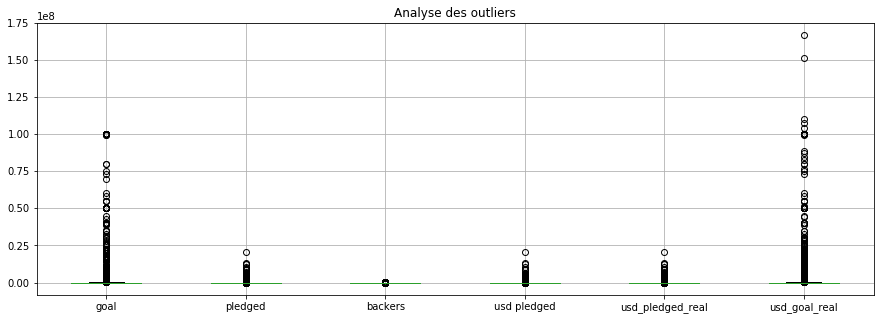

In [10]:
df.boxplot(figsize=(15,5))
plt.title("Analyse des outliers")



Cela ne prend en compte que les données quantitatives 

## 2- Analyse Univariée

## A quel moment les projets ont été lancés ? 

In [11]:
#convertir les "deadline" et les valeurs "launched" en datatime dtype
df.loc[:,['deadline', 'launched']] = df.loc[:,['deadline', 'launched']].apply(pd.to_datetime)

#extraire seulement la date de la colonne launched 
df['launched'] = df['launched'].dt.date

df['launched'] = pd.to_datetime(df['launched'])

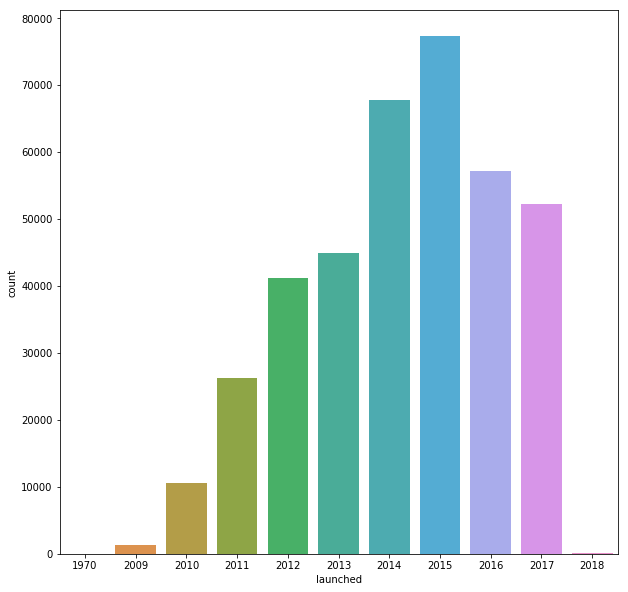

In [12]:
plt.figure(figsize=(10,10))
plot = sns.countplot(x= df['launched'].dt.year, data = df)

Les projets ont été lancés entre 2009 et 2018, la plus grande partie du projet ayant débuté en 2014-2015.

## Etudions la durée de financement des projets

In [13]:
#fonction =période de financement entre les dates de lancement et les deadlines.
df['funding_period'] = df['deadline'] - df['launched']

#Convertir la fonction en Int
df['funding_period'] = df['funding_period'].dt.days

#regarder la variable funding_period
df['funding_period'].describe()

#s'occuper des outliers
df[df['funding_period'] > 100]

#se débarasser des valeures qui semblent être incorrectes 
df = df.drop(df[df['funding_period'] > 100 ].index)

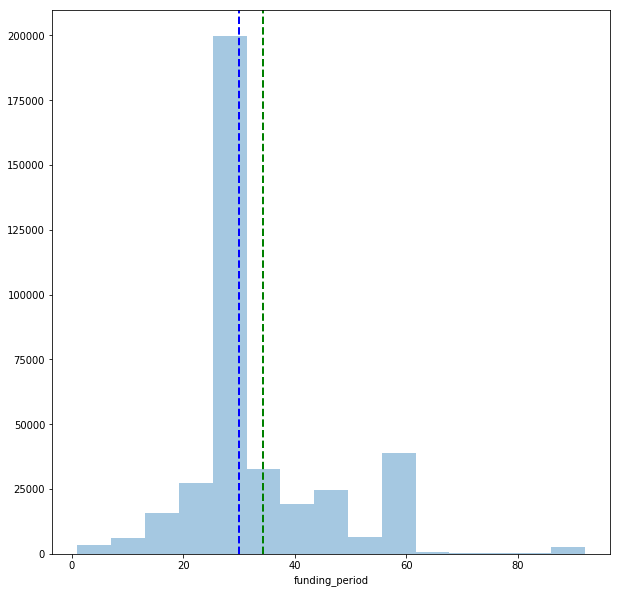

In [14]:
plt.figure(figsize=(10,10))
plot= sns.distplot(df['funding_period'], kde = False, bins = 15)
plot.axvline(df['funding_period'].mean(), color='g', linestyle='dashed', linewidth=2)
plot.axvline(df['funding_period'].median(), color='b', linestyle='dashed', linewidth=2)

La plupart des projets ont une période de financement d'environ 30 jours.



## Dans quelle catégorie y a t-il eu le plus de projet ? 

In [15]:
df.groupby('category').size()

category
3D Printing            683
Academic               916
Accessories           3165
Action                 740
Animals                255
Animation             2541
Anthologies            784
Apparel               7166
Apps                  6345
Architecture           760
Art                   8252
Art Books             2676
Audio                  410
Bacon                  221
Blues                  268
Calendars              329
Camera Equipment       416
Candles                429
Ceramics               305
Children's Books      6756
Childrenswear          483
Chiptune                35
Civic Design           289
Classical Music       2613
Comedy                2320
Comic Books           2743
Comics                4996
Community Gardens      298
Conceptual Art        1030
Cookbooks              540
                     ...  
Shorts               12357
Small Batch           1808
Software              3048
Sound                  669
Space Exploration      323
Spaces             

Text(0.5, 1.0, 'Principales catégories')

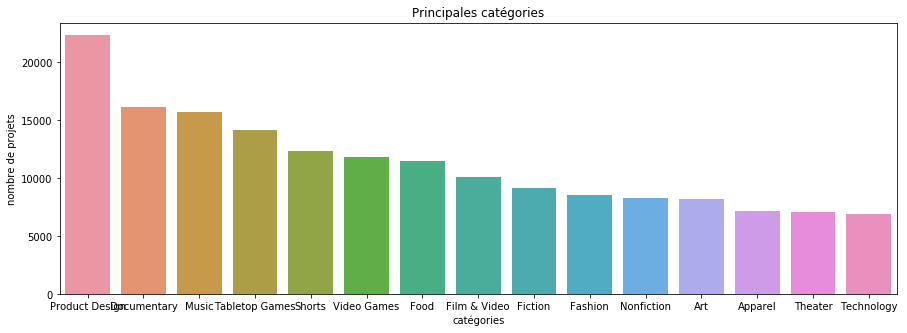

In [16]:
categories = df.category.value_counts()
plt.figure(figsize=(15, 5))
sns.barplot(x=categories[:15].index, y=categories[:15].values)
plt.ylabel('nombre de projets')
plt.xlabel('catégories')
plt.title('Principales catégories')

Tout d'abord on cherche à savoir dans quel domaine il y a eu le plus de projets réalisés et on peut remarquer que c'est dans le domaine du film vidéo et musique

## Regardons l'état de l'avancement des projets  

In [17]:
df.groupby('state').size()

state
canceled       38773
failed        197716
live            2799
successful    133956
suspended       1844
undefined       3562
dtype: int64

Text(0.5, 1.0, 'Etat du projet')

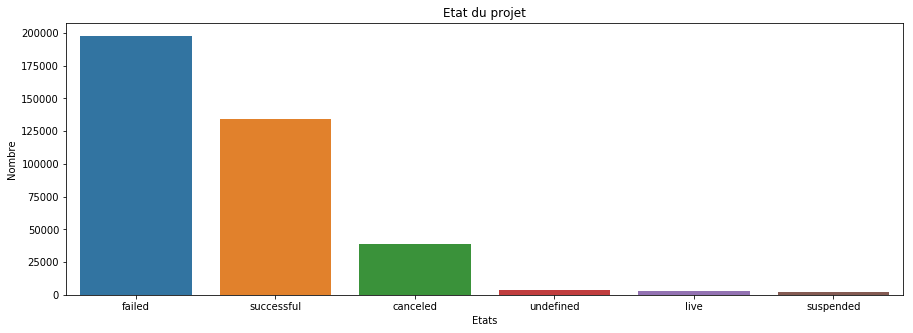

In [18]:
machin = df.state.value_counts()
plt.figure(figsize=(15, 5))
sns.barplot(x=machin[:6].index, y=machin[:6].values)
plt.ylabel('Nombre')
plt.xlabel('Etats')
plt.title('Etat du projet')

On remarque une grosse proportion de projets qui ont echoués ou qui ont été annulés

## Quels sont les pays d'origine des projets? 

In [19]:
df.groupby('country').size()

country
AT         597
AU        7839
BE         617
CA       14756
CH         760
DE        4171
DK        1113
ES        2276
FR        2939
GB       33671
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292618
dtype: int64

Text(0.5, 1.0, 'nombre de pays dans le dataframe')

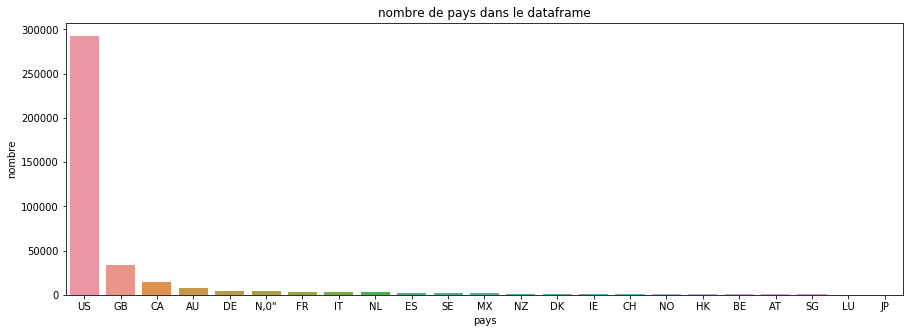

In [20]:
test=df.country.value_counts()
plt.figure(figsize=(15, 5))
sns.barplot(x=test[:23].index, y=test[:23].values)
plt.ylabel('nombre')
plt.xlabel('pays')
plt.title('nombre de pays dans le dataframe')

La plus grande partie des projets provient des États-Unis (77%), il y a aussi quelques projets de la Grande-Bretagne et du Canada (9% et 4% respectivement), les autres pays ont très peu de projets sur Kickstarter.

## On va s'interesser au catégorie les plus rentables

In [21]:
#obtenir la moyenne des projets dans toutes les catégories
mean_categories = df.pivot_table('pledged', index='category', columns='state', aggfunc='mean').sort_values('successful', ascending=False)

#prendre simplement les "successful" et les afficher en pourcentage
profitable_categories = mean_categories['successful']
profitable_categories[0:10].apply(lambda x: '{0:.0f}'.format(x))


category
3D Printing          184708
Camera Equipment     173270
Wearables            171121
Fabrication Tools    170929
Gaming Hardware      164793
Sound                152518
Flight               131518
Hardware             118866
Gadgets              101888
Technology            94020
Name: successful, dtype: object

La rentabilité des projets est plus importantes sur le l'impression 3D, les equipements photos et les portables.

## Ainsi qu'aux catégories qui connaissent le plus de succès

In [22]:
#compter le pourcentage de toutes les catégories
count_categories = df.pivot_table('pledged', index='category', columns='state', aggfunc='count')
#obtenir le pourcentage de chaque état et trier par succès
percent_count_successful = count_categories.apply(lambda x: x*100/x.sum(), axis=1).sort_values('successful', ascending=False)
# prendre simplement les réussites
successfull_categories = percent_count_successful['successful']
successfull_categories[0:10].apply(lambda x: '{0:.0f}%'.format(x))

category
Chiptune           77%
Residencies        72%
Anthologies        66%
Dance              66%
Indie Rock         64%
Letterpress        63%
Country & Folk     63%
Classical Music    63%
Theater            62%
Performances       62%
Name: successful, dtype: object

Chiptune, Residencies et Anthologies sont les catégories qui connaissent le plus de succès 

## 3 - Analyse Multivariée 

## Nombre d'investisseurs par rapport à l'état du projet


Text(0.5, 1.0, "Nombre d'investisseur par rapport à l'état du projet")

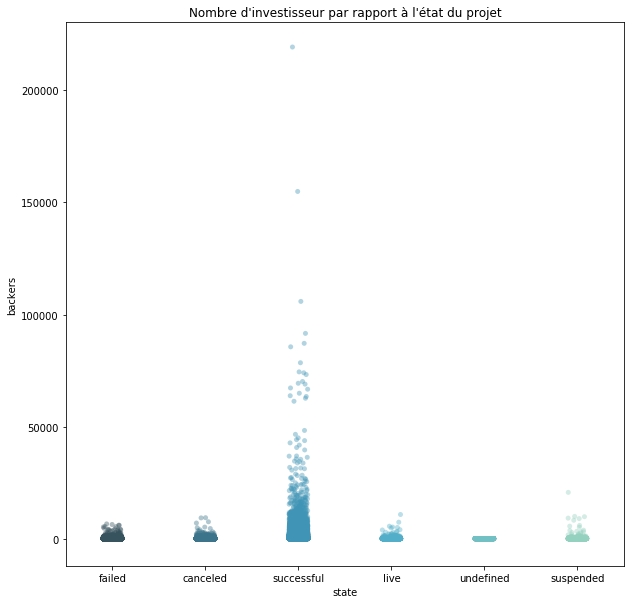

In [23]:
plt.figure(figsize=(10,10))
plot = sns.stripplot('state', # Horizontal axis
           'backers', # Vertical axis
           data=df,jitter = .1, alpha = .4, palette = 'GnBu_d')
plt.title('Nombre d\'investisseur par rapport à l\'état du projet')


Il semble que les projets réussis ont tendance à avoir beaucoup plus d'investisseurs que les projets non réussis.

## Objectifs de financement par rapport à l'état du projet

Text(0.5, 1.0, 'objectifs financement par rapport à état du projet')

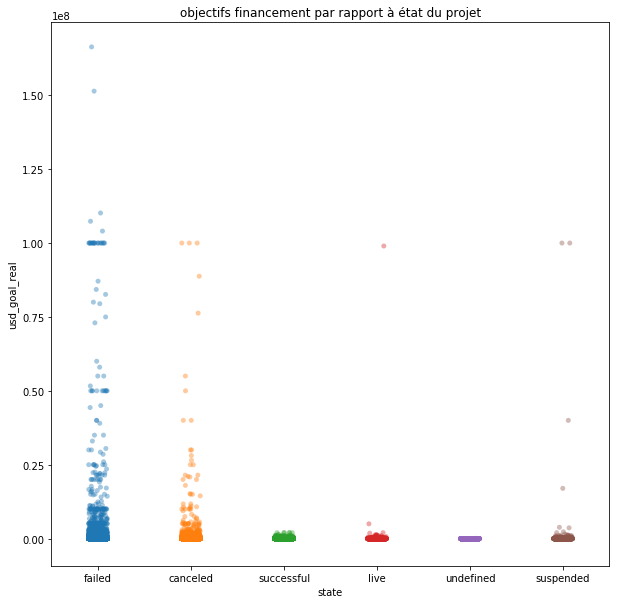

In [24]:
plt.figure(figsize=(10,10))
plot = sns.stripplot('state', 
           'usd_goal_real',
           data=df, jitter = .1, alpha= .4)
plt.title ('objectifs financement par rapport à état du projet')

Ce graphique nous montre que les projets réussis ont généralement des objectifs de financement assez modeste, tandis que les projets qui ont échoué ou qui ont été annulés fixent des objectifs de financement très élevés.

## Catégorie principale du projet par rapport à l'objectif de financement

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(

Text(0.5, 1.0, 'Représentation graphique des catégories principales/ leur objectif de financement')

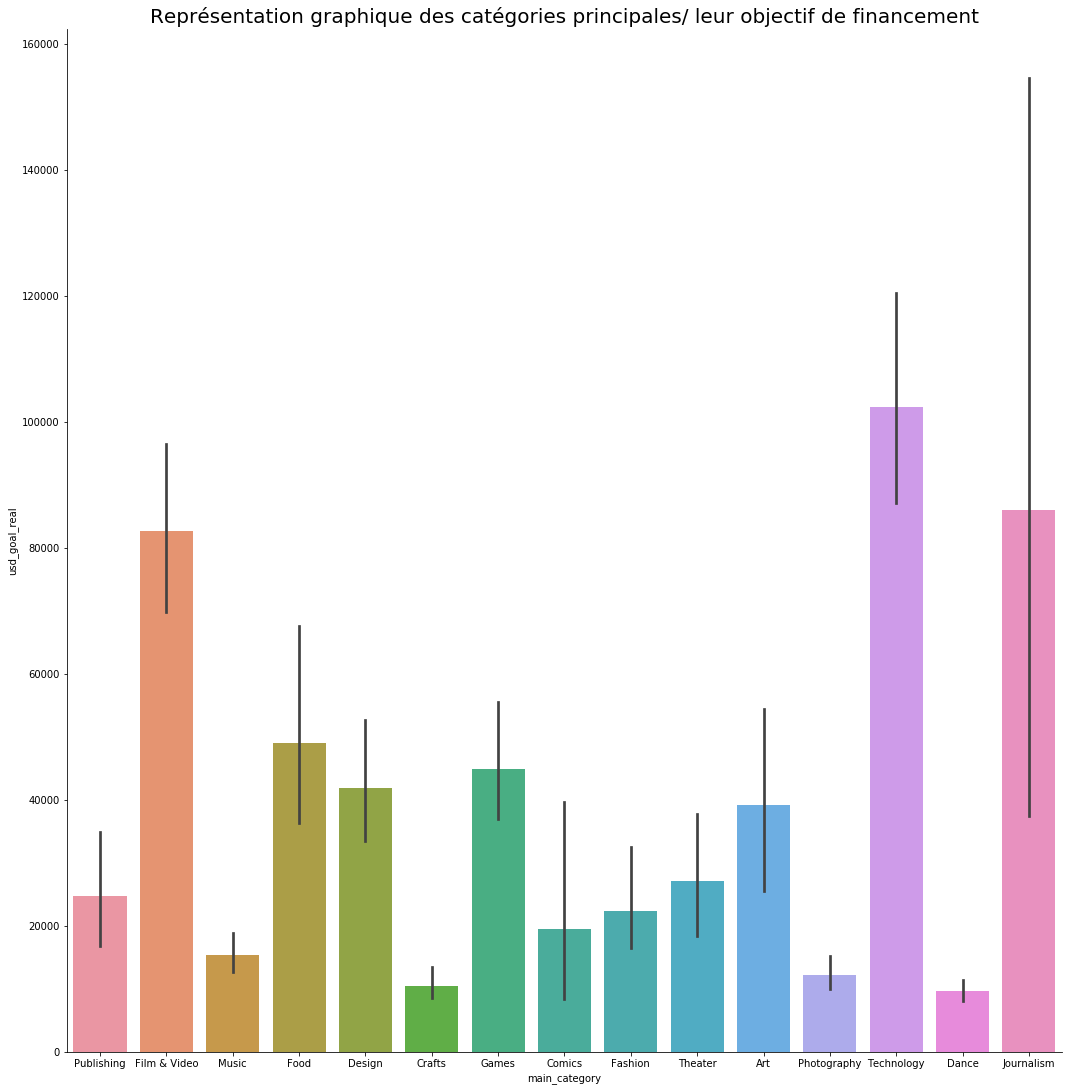

In [25]:
plot = sns.factorplot(x="main_category", y="usd_goal_real", data= df, kind="bar", size = 15)
plt.title("Représentation graphique des catégories principales/ leur objectif de financement", fontsize = 20)


Il semble que les projets les plus ambitieux se situent dans les catégories Journalisme, Technologie et Film & Vidéo.

## Investissement par pays

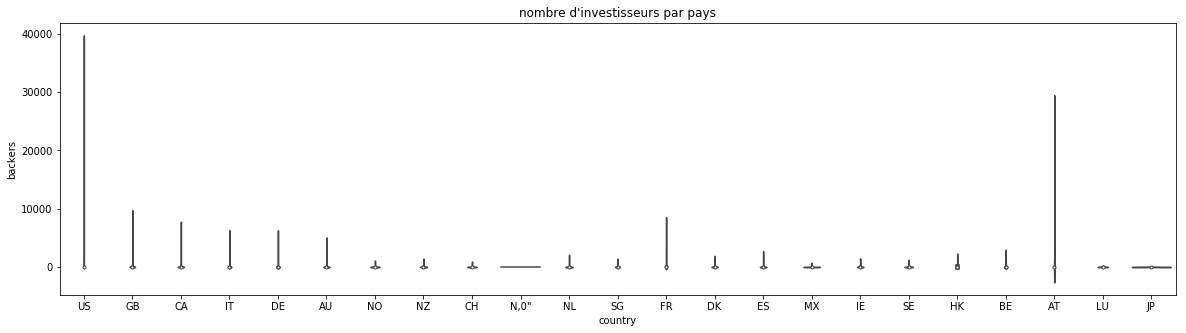

In [26]:
df.head()
plt.subplots(figsize=(20,5))
plt.title ('nombre d\'investisseurs par pays')
sns.violinplot(
    x='country',
    y='backers',
    data=df[(df['backers'] < 50000)].sample(50000)
)

Ce violin plot traduit plus ou moins la popularité de chaque pays.

## Succès et échec selon les catégories

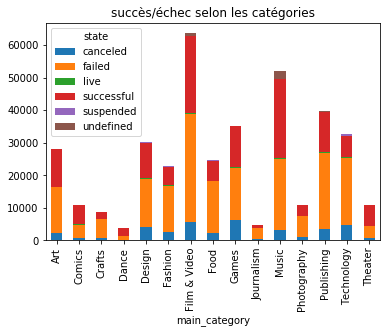

In [27]:
d_sucCat = df.groupby('main_category').state.value_counts().sort_index().unstack()
d_sucCat.plot.bar(stacked=True)
plt.title ('succès/échec selon les catégories')
plt.show()

Le graphique semble montrer que peu importe la catégorie que l'échecs est supérieurs à la réussite, dans certains cas comme le théatre ou les comics il y a plus de succès que d'échecs.

## Part des projets qui ont réussi sans le montant d'argent fixé

In [28]:
state_sucess_fail = df['state']

# on remplace toute celle qui ne sont pas successful par not successful

state_sucess_fail.replace('canceled', False, inplace=True)
state_sucess_fail.replace('live', False, inplace=True)
state_sucess_fail.replace('failed', False, inplace=True)
state_sucess_fail.replace('undefined', False, inplace=True)
state_sucess_fail.replace('suspended', False, inplace=True)
state_sucess_fail.replace('successful', True, inplace=True)
df['is_success'] = state_sucess_fail
df['fusion_engaged_goal_read'] = df['usd_pledged_real'] - df['usd_goal_real']
negativ_goal = df[df['fusion_engaged_goal_read'] < 0]
print(len(negativ_goal[negativ_goal['is_success'] == True]) )
print(len(negativ_goal[negativ_goal['is_success'] == True])/len(df[df['is_success'] == True]))



5
3.732568903221953e-05


on constate que seulement 5 projets ont réussi sans atteindre le montant d'argent fixé.


## Conclusion 

De nombreuses variables semblent influer sur la réussite ou non d'un projet avec kickstarter, comme atteindre le montant fixé, être dans un pays comme les US et bien d'autres variables. Il est donc très dur avec ce dataset de prédire les chances de succès 